In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create Spark Clusters

In [ ]:
#Update system packages
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:15 http://a

#install Java

In [ ]:
!apt-get install openjdk-8-jdk-headless 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 61 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.04 [8,298 kB]
Fetched 36.5 MB in 5s (6,697 kB/s)
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading databas

## Import Pyspark Library

In [ ]:
#Install pyspark
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 198 kB 56.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=c42b56f0fbfa2e21b405fe17ea61f59b05720fd4fe10cc3a2ee8f86895b6ed2b
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

import pyarrow

#setting the environment path 


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

#Running a local SparkSession


In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

## Other Libraries

In [ ]:
from pyspark.sql.functions import *
from functools import reduce
from pyspark.ml.classification import  RandomForestClassifier
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorSlicer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
import seaborn as sns
from sklearn.metrics import classification_report
from pyspark.sql.functions import col,sum

## Load Data

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/UNSW-NB15.csv", inferSchema=True)

## Reanme Columns

In [ ]:
newColumns = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur',
       'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
       'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

In [ ]:
for c,n in zip(df.columns,newColumns):
    df=df.withColumnRenamed(c,n)

In [ ]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[srcip: string, sport: int, dstip: string, dsport: int, proto: string, state: string, dur: double, sbytes: int, dbytes: int, sttl: int, dttl: int, sloss: int, dloss: int, service: string, Sload: double, Dload: double, Spkts: int, Dpkts: int, swin: int, dwin: int, stcpb: bigint, dtcpb: bigint, smeansz: int, dmeansz: int, trans_depth: int, res_bdy_len: int, Sjit: double, Djit: double, Stime: int, Ltime: int, Sintpkt: double, Dintpkt: double, tcprtt: double, synack: double, ackdat: double, is_sm_ips_ports: int, ct_state_ttl: int, ct_flw_http_mthd: int, is_ftp_login: int, ct_ftp_cmd: int, ct_srv_src: int, ct_srv_dst: int, ct_dst_ltm: int, ct_src_ ltm: int, ct_src_dport_ltm: int, ct_dst_sport_ltm: int, ct_dst_src_ltm: int, attack_cat: string, Label: int]>

In [ ]:
df.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|L

## Number of Rows

In [ ]:
print("Total Number of Data", df.count())

Total Number of Data 2539739


## Data Describtion

In [ ]:
df.describe().show()

+-------+-----------+------------------+-----------+------------------+-------+-------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-------+--------------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+-----------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+----------+-------------------+
|summary|      srcip|             sport|      dstip|            dsport|  proto|  state|             

## Data Schema

In [ ]:
df.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

## Fill Attack Cat Null values with Normal

In [ ]:
df = df.na.fill(value='Normal',subset=["attack_cat"])

## Checking Null Values

In [ ]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-----+-----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|srcip|sport|dstip|dsport|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Stime|Ltime|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+-----+-----+------+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+--

## Creating Hive Table

In [ ]:
df.createOrReplaceTempView("hiveunsw")

In [ ]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | hiveunsw|       true|
+---------+---------+-----------+



## Exploratory Analysis

In [ ]:
data = spark.sql("SELECT * FROM hiveunsw")

In [ ]:
data.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|L

## Data Visulization

## Binary Label

* 1 is attack
* 0 is normal

In [ ]:
binary = spark.sql("SELECT Label, count(Label) as total FROM hiveunsw group by Label")
binary.show()

+-----+-------+
|Label|  total|
+-----+-------+
|    1| 321283|
|    0|2218456|
+-----+-------+



In [ ]:
binary  = binary.toPandas()

In [ ]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


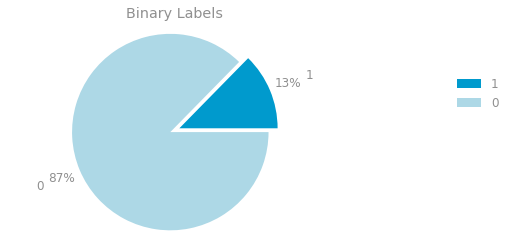

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

explode=(0.1,0)
ax.pie(binary['total'], explode=explode, labels=binary['Label'],  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Binary Labels")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

## Multi label

In [ ]:
multi = spark.sql("SELECT attack_cat, count(attack_cat) as total FROM hiveunsw group by attack_cat")
multi.show()

+---------------+-------+
|     attack_cat|  total|
+---------------+-------+
|          Worms|    174|
|       Analysis|   2677|
|     Shellcode |   1288|
|            DoS|  16353|
|Reconnaissance |  12228|
|       Backdoor|   1795|
|       Fuzzers |  19195|
|       Exploits|  44525|
|         Normal|2218456|
|        Generic| 215481|
|      Shellcode|    223|
|      Backdoors|    534|
|        Fuzzers|   5051|
| Reconnaissance|   1759|
+---------------+-------+



In [ ]:
multi  = multi.toPandas()

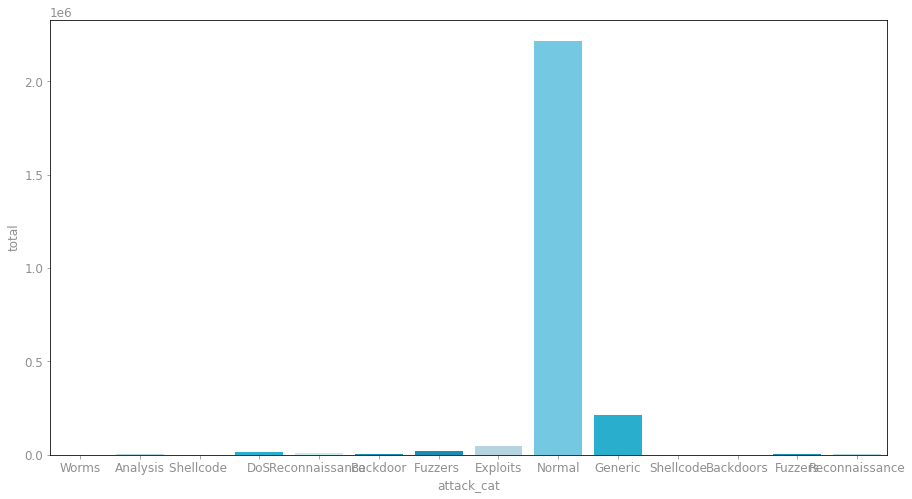

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x='attack_cat', y = 'total',  
            data = multi, palette=color_palette_list, 
            label="Multi Label",ax=ax, 
            ci=None)

## Checking Top State or Protocal used for attacking

In [ ]:
data.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|L

In [ ]:
atck = spark.sql('select attack_cat,state,proto, count(*) as total from hiveunsw where attack_cat != "Normal" group by attack_cat,proto,state order by total desc Limit 50')

## This shows:

* FIN and Tcp is the most used state and protocal when anomaly attack occur
* INT and UDP is the most used attack tho where generic attack being done thorugh it

In [ ]:
atck.show()

+---------------+-----+-----+------+
|     attack_cat|state|proto| total|
+---------------+-----+-----+------+
|        Generic|  INT|  udp|210504|
|       Exploits|  FIN|  tcp| 27317|
|       Fuzzers |  FIN|  tcp| 12371|
|       Exploits|  INT| unas|  6532|
|Reconnaissance |  FIN|  tcp|  5942|
|            DoS|  INT| unas|  5246|
|       Fuzzers |  INT|  udp|  4781|
|Reconnaissance |  INT|  udp|  4173|
|            DoS|  FIN|  tcp|  3237|
|        Generic|  FIN|  tcp|  3108|
|        Fuzzers|  FIN|  tcp|  3090|
|       Exploits|  INT| ospf|  1094|
| Reconnaissance|  FIN|  tcp|  1014|
|        Fuzzers|  INT|  udp|   941|
|       Analysis|  INT| unas|   926|
|Reconnaissance |  INT| unas|   840|
|       Fuzzers |  INT| unas|   720|
|        Generic|  INT| unas|   720|
| Reconnaissance|  INT|  udp|   715|
|            DoS|  INT| ospf|   676|
+---------------+-----+-----+------+
only showing top 20 rows



In [ ]:
atck = atck.toPandas()

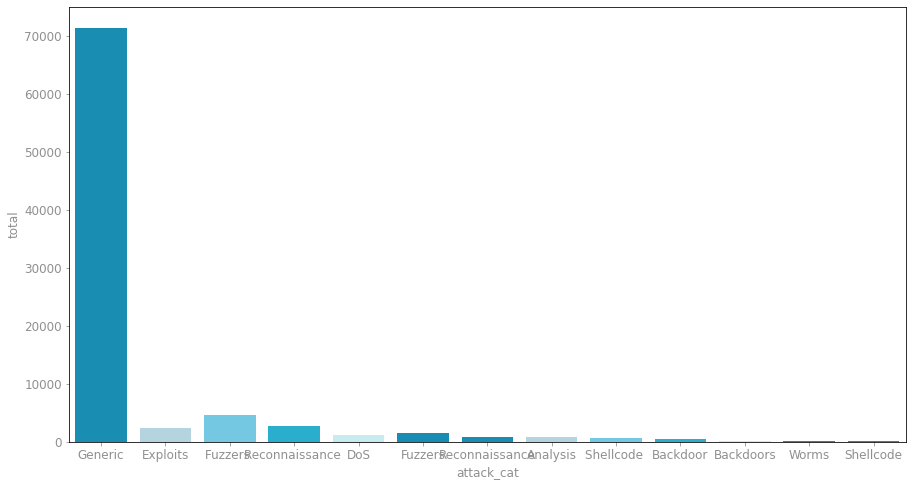

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x='attack_cat', y = 'total',  
            data = atck, palette=color_palette_list, 
            label="Multi Label",ax=ax, 
            ci=None)

## ct_flw_http_mthd

Numerical feature with small discreate set of values.

## No. of flows that has methods such as Get and Post in http service.

* For normal almost all the values are 0 and few 1.
* In attack data everything is 0 and there is very very litle no of 1's

In [ ]:
ct_flw_http_mthd = spark.sql("select ct_flw_http_mthd, Label  as total from hiveunsw")

In [ ]:
ct_flw_http_mthd = ct_flw_http_mthd.toPandas()

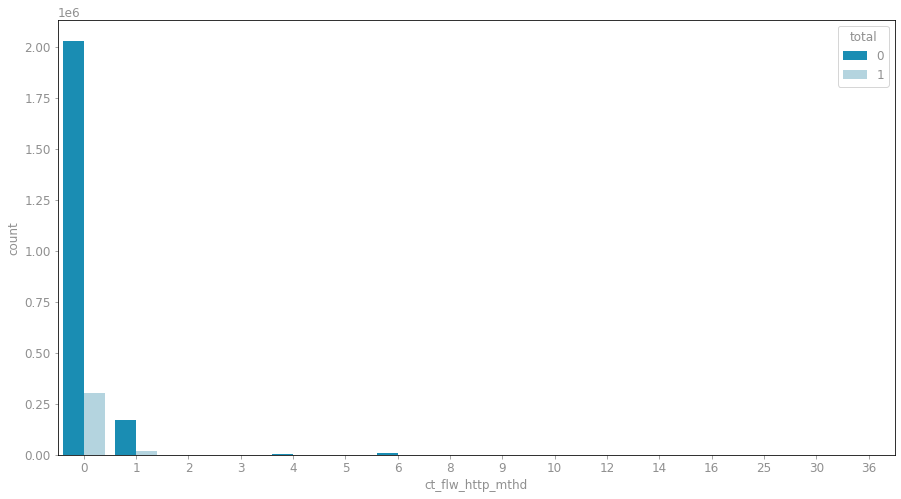

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(x='ct_flw_http_mthd', hue = 'total',  
            data = ct_flw_http_mthd, palette=color_palette_list,ax=ax)

In [ ]:
import seaborn as sns

## ct_srv_src
No. of connections that contain the same service and source address 




In [ ]:
def dis_plot(col, label):
  sns.displot(col, label=label)

In [ ]:
ct_srv_src = spark.sql("select ct_srv_src,Label from hiveunsw")

In [ ]:
ct_srv_src = ct_srv_src.toPandas()

In [ ]:
ct_srv_src_normal = ct_srv_src[ct_srv_src["Label"] == 0]
ct_srv_src_attack = ct_srv_src[ct_srv_src["Label"] == 1]

## For normal most of the values are from 0 to 15.


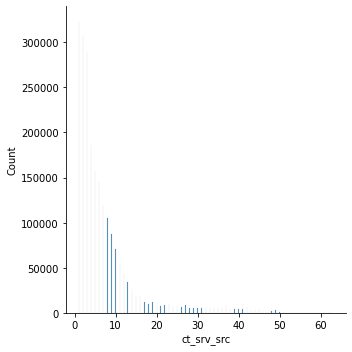

In [ ]:
dis_plot(ct_srv_src_normal['ct_srv_src'],'normal')

## For anomaly most of the values are from 0 to 10 with more distributed between 25 to 35

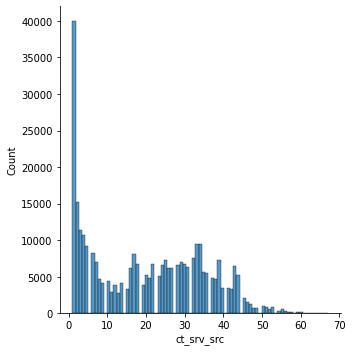

In [ ]:
dis_plot(ct_srv_src_attack['ct_srv_src'],'attack')

## swin

Source TCP window advertisement

* 22 Unique Features

In [ ]:
swin = spark.sql("select swin,Label from hiveunsw")

In [ ]:
swin_ = swin.toPandas()

* Most of the values of this feature are just 0 and 255
* Normal cat data has most of its values 255
* Attack act has large no of 0 and small no of 255, just the inverse of normal cat.




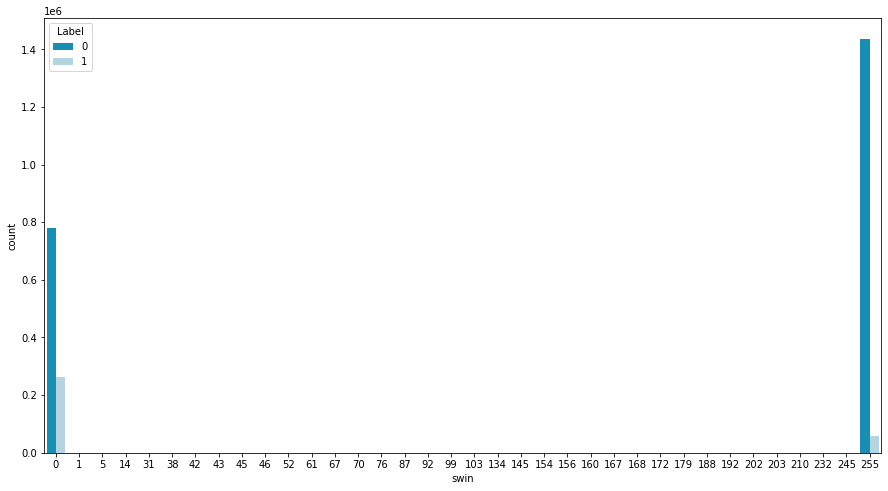

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(x='swin', hue = 'Label',  
            data = swin_, palette=color_palette_list,ax=ax)

## State (The state and its dependent protocol)

In [ ]:
state = spark.sql("select state,Label from hiveunsw")

In [ ]:
state_ = state.toPandas()

In [ ]:
state_['state'].value_counts()

FIN    1478689
CON     560588
INT     490469
REQ       9043
RST        528
CLO        161
ECO         96
URH         54
ACC         43
PAR         26
ECR          8
TST          8
URN          7
MAS          7
no           7
TXD          5
Name: state, dtype: int64

## State

* For non-attacks "fin" is very frequent then "cons" almost half of "fin" and few "int" also.
* In attack "int" is higher than normal cat values. That could be really important feature to detect. There are very few "fin"

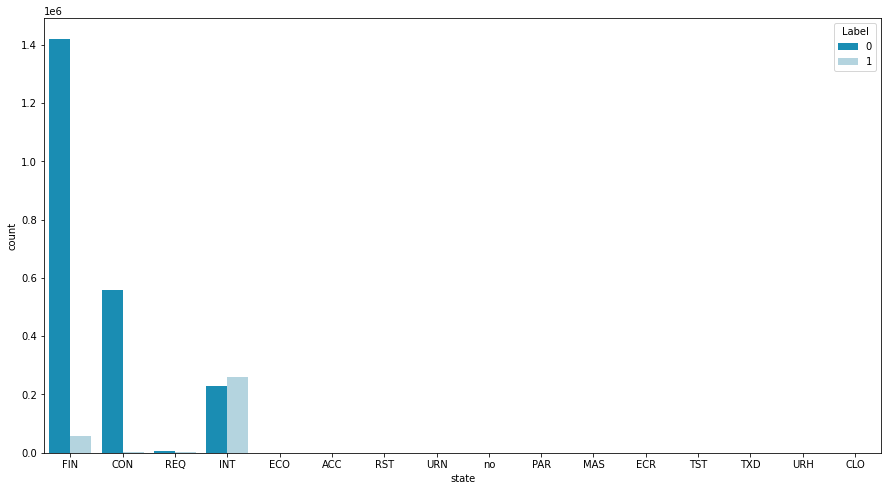

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(x='state', hue = 'Label',  
            data = state_, palette=color_palette_list,ax=ax)

## Apply Person Correlation to find the highly correlated features

The correlation coefficient has a range of values from -1 to 1.

* A number near 0 indicates a lesser connection (precise 0 indicates no association). 
* A value near 1 indicates a stronger positive correlation. 

* A number nearer to -1 denotes a more pronounced negative correlation.

Formula is as follows: 

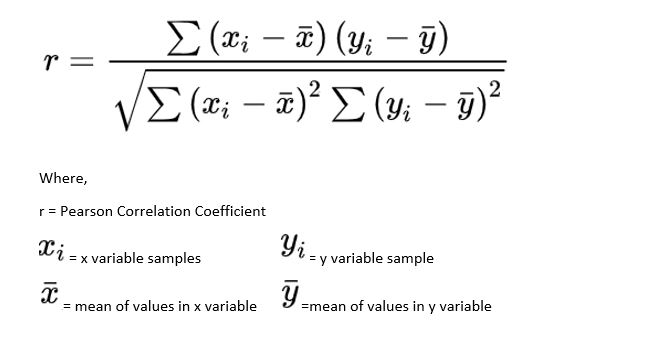




In [ ]:
df_pd = data.toPandas()

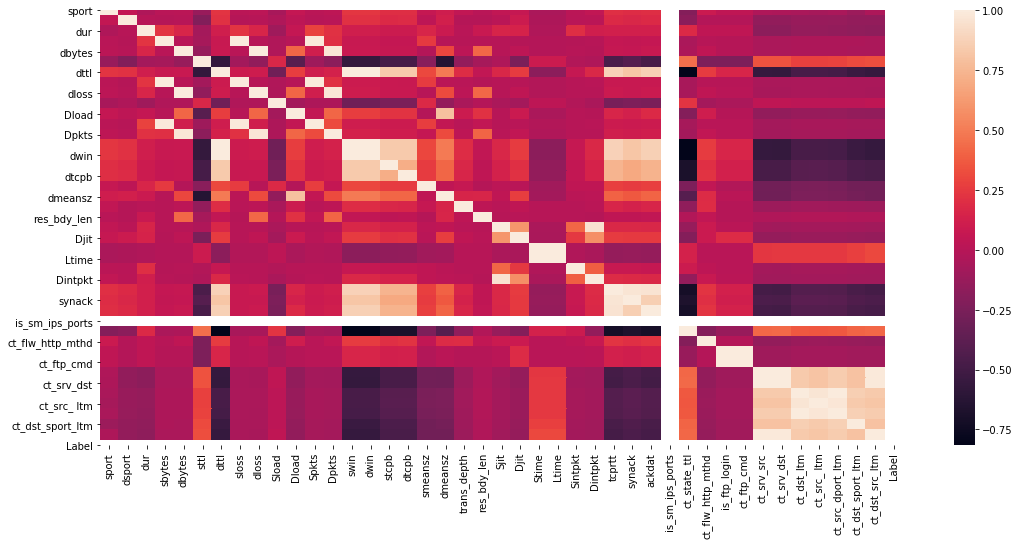

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18,8))
sns.heatmap(df_pd.corr())

## Pair Plots of High Correlation Features

In [ ]:
data_ = spark.sql("select "'sbytes'","'sloss'" from hiveunsw")

In [ ]:
data_ = data_.toPandas()

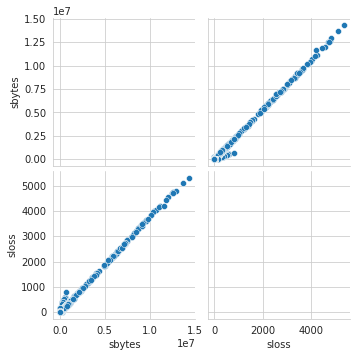

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=data_, vars=['sbytes', 'sloss'])
plt.show()

## Binary Classification

## Convert Categorical into One HOt Coder

Inmachine learning, a one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0)

In [ ]:
from pyspark.ml.feature import OneHotEncoder

In [ ]:
from pyspark.ml import Pipeline

## But to Convert into One Hot First the String need to be converted into Numeric using String Indexer

In [ ]:
dstip_s = StringIndexer(inputCol="dstip", outputCol="dstips")
proto_s = StringIndexer(inputCol="proto", outputCol="protos")
state_s = StringIndexer(inputCol="state", outputCol="states")
service_s = StringIndexer(inputCol="service", outputCol="services")
attack_cat_s = StringIndexer(inputCol="attack_cat", outputCol="attack_cat_s")
srcip_sr = StringIndexer(inputCol="srcip", outputCol="srcips")

In [ ]:
pipe = Pipeline(stages = [dstip_s,proto_s,state_s,service_s,attack_cat_s,srcip_sr])

In [ ]:
datas = pipe.fit(data).transform(data)
datas.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+------+------+------+--------+------------+------+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dpor

In [ ]:
dstip_one = OneHotEncoder(inputCol="dstips", outputCol="dstipone")
proto_one = OneHotEncoder(inputCol="protos", outputCol="protoone")
state_one = OneHotEncoder(inputCol="states", outputCol="stateone")
service_one = OneHotEncoder(inputCol="services", outputCol="serviceone")
attack_cat_one = OneHotEncoder(inputCol="attack_cat_s", outputCol="attack_catsone")
srcip_one = OneHotEncoder(inputCol="srcips", outputCol="srcipone")

In [ ]:
pipe = Pipeline(stages = [dstip_one,state_one,proto_one,service_one,attack_cat_one,srcip_one])

## Converting into One Hot

In [ ]:
data_one = pipe.fit(datas).transform(datas)
data_one.show(5)

+----------+-----+-------------+------+-----+-----+-----------+------+------+----+----+-----+-----+-------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+----------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+------+------+------+--------+------------+------+--------------+--------------+---------------+--------------+--------------+--------------+
|     srcip|sport|        dstip|dsport|proto|state|        dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|     Stime|     Ltime|  Sintpkt|   Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ft

## Creating Feature Vector for Model To train on

In Pyspark Model Need Two Things

* Feature Vector
* Label

So For Feature Vector is created through Vector Assembler

In [ ]:
col = ['dstip', 'proto','state','service','attack_cat','srcip']
data_one = data_one.drop(*col)

In [ ]:
col=data_one.columns
va = VectorAssembler(inputCols=col,outputCol='features')
data_one = va.transform(data_one)
new_data = data_one.select('features', 'Label').show() #we can apply truncate=False to see all features

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
|(310,[0,1,2,3,4,5...|    0|
+--------------------+-----+
only showing top 20 rows



## Min Max Scaler

### For scaling we are using **MINMAX** Method

In [ ]:
from pyspark.ml.feature import MinMaxScaler

In [ ]:
MinMaxScaler = MinMaxScaler(inputCol="features", outputCol="features_minmax")
data_mm=MinMaxScaler.fit(data_one).transform(data_one)

## SPlit dataset

In [ ]:
traindata,testdata=data_mm.randomSplit([0.80,0.20])

## Train Model

### Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression(featuresCol='features_minmax', labelCol='Label').fit(traindata)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## Evalution

In [ ]:
lr_pred=lr.transform(testdata)
lr_pred.show()

+-----+------+---+------+------+----+----+-----+-----+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+----------+----------+---------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+-----+------+------+------+--------+------------+------+---------------+--------------+---------------+--------------+--------------+---------------+--------------------+--------------------+--------------------+--------------------+----------+
|sport|dsport|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|     Stime|     Ltime|  Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|Label

## **Confusion Matrix**

Confusion Matrix is baesd on four conditions:

* TP: Cancellation that are detected Correctly
* TN: Non Cancellation  that are detected Correctly
* FP: Cancellation  that are detected incorrectly as Non Cancellation
* FN: Non Cancellation that are detected incorrectly as Cancellation

In [ ]:
lr_accuracy=MulticlassClassificationEvaluator(labelCol='Label',metricName='accuracy').evaluate(lr_pred)
print('The Model Accuracy is',lr_accuracy)

The Model Accuracy is 1.0


In [ ]:
actual = lr_pred.select('Label').toPandas()
pred = lr_pred.select('prediction').toPandas()

In [ ]:
def plot_confusion_matrix(data, labels, output_filename):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

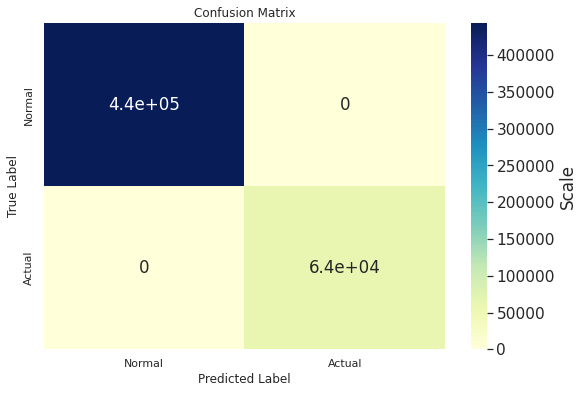

In [ ]:
labels = ['Normal','Actual']
cnmatrix = confusion_matrix(actual, pred)
plot_confusion_matrix(cnmatrix, labels, "confusion_matrix.png")

In [ ]:
print(classification_report(actual,pred,target_names=['Normal','Attack']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    443524
      Attack       1.00      1.00      1.00     63752

    accuracy                           1.00    507276
   macro avg       1.00      1.00      1.00    507276
weighted avg       1.00      1.00      1.00    507276



## Multi CLassification

In [ ]:
datams = data_mm.select('features_minmax', 'attack_cat_s')

In [ ]:
newmdata = datams.withColumnRenamed("features_minmax","features")
newmdata = newmdata.withColumnRenamed("attack_cat_s","Label")
newmdata.show()

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
|(310,[0,1,2,3,4,5...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [ ]:
traindata,testdata=newmdata.randomSplit([0.80,0.20])

In [ ]:
from pyspark.ml.classification import OneVsRest

lr=LogisticRegression(featuresCol='features', labelCol='Label')
lrr = OneVsRest(classifier=lr)
lrr_model = lrr.fit(traindata) 

## Evalution

In [ ]:
lr_pred=lrr_model.transform(testdata)
lr_pred.show()

+--------------------+-----+--------------------+----------+
|            features|Label|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|(310,[0,1,2,3,4,5...|  2.0|[-25.017156638007...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-24.183186569746...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-24.183186569746...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-25.485532154027...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-25.485532154027...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-25.485532154027...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-26.444569720622...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-24.702652697810...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-25.602265407568...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-26.216196680897...|       2.0|
|(310,[0,1,2,3,4,5...|  2.0|[-25.053170258451...|       2.0|
|(310,[0,1,2,3,4,5...|  8.0|[-41.417767136538...|       8.0|
|(310,[0,1,2,3,4,5...|  2.0|[-24.858631931028...|       2.0|
|(310,[0,1,2,3,4,5...|  

In [ ]:
lr_accuracy=MulticlassClassificationEvaluator(labelCol='Label',metricName='accuracy').evaluate(lr_pred)
print('The Model Accuracy is',lr_accuracy)

The Model Accuracy is 1.0


In [ ]:
actual = lr_pred.select('Label').toPandas()
pred = lr_pred.select('prediction').toPandas()

In [ ]:
cnmatrix = confusion_matrix(actual, pred)

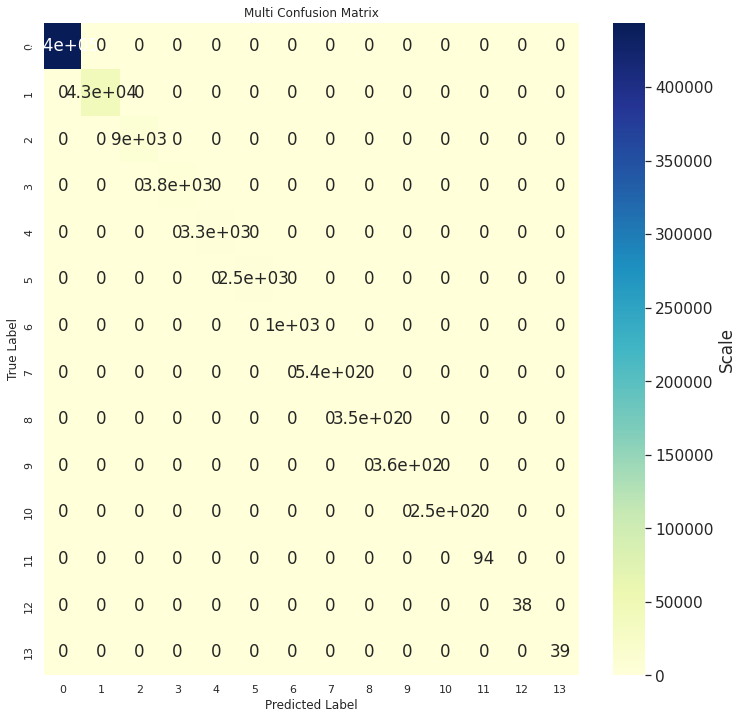

In [ ]:
sns.set(color_codes=True)
plt.figure(1, figsize=(12, 12))
 
plt.title("Multi Confusion Matrix")
 
sns.set(font_scale=1.4)
ax = sns.heatmap(cnmatrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.savefig("confusion_matrix mulit.png", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [ ]:
print(classification_report(actual,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    443732
         1.0       1.00      1.00      1.00     42915
         2.0       1.00      1.00      1.00      9012
         3.0       1.00      1.00      1.00      3813
         4.0       1.00      1.00      1.00      3322
         5.0       1.00      1.00      1.00      2492
         6.0       1.00      1.00      1.00      1001
         7.0       1.00      1.00      1.00       535
         8.0       1.00      1.00      1.00       348
         9.0       1.00      1.00      1.00       356
        10.0       1.00      1.00      1.00       248
        11.0       1.00      1.00      1.00        94
        12.0       1.00      1.00      1.00        38
        13.0       1.00      1.00      1.00        39

    accuracy                           1.00    507945
   macro avg       1.00      1.00      1.00    507945
weighted avg       1.00      1.00      1.00    507945

